# Lecture 3

**Lesson Objectives**
 -  Reviewing finite difference schemes 
 

_______
## Reviewing Finite Difference Schemes

Just for review, let's list the finite difference schemes discussed, with both $f(x)$ and $f_i$ notation provided, where if $f_{i}=f(x)$ then $f_{i\pm 1}=f(x\pm h)$. 



When dealing with first order derivatives, we can use the following schemes:

**Forward Difference (FD1)**

$$f'(x)=\frac{f(x+h)-f(x)}{h}+\frac{h}{2}f''(c),\qquad c\in(x,x+h)$$

$$f'_{i}=\frac{f_{i+1}-f_{i}}{h}+\mathcal{O}(h)$$

**Backward Difference (BD1)**

$$f'(x)=\frac{f(x)-f(x-h)}{h}-\frac{h}{2}f''(c),\qquad c\in(x-h,x)$$

$$f'_{i}=\frac{f_{i}-f_{i-1}}{h}+\mathcal{O}(h)$$

**Centered Difference (CD2)**

$$f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\frac{h^{2}}{6}f^{(3)}(c) ,\qquad  c\in(x-h,x+h)$$

$$f'_{i}=\frac{f_{i+1}-f_{i-1}}{2h}+\mathcal{O}(h^{2})$$

**3-Point Endpoint Formula ('341' approx., FD2, BD2)**

$$f'(x)=\frac{-3 f(x)+4f(x+h)-f(x+2h)}{2h}+\frac{h^2}{3}f^{(3)}(c),\qquad  c\in(x,x+2h)$$

$$f'_i=\frac{-3 f_i+4f_{i+1}-f_{i+2}}{2h}+\mathcal{O}(h^{2})$$

Which can also be used in the opposite direction

$$f'(x)=\frac{-3 f(x)+4f(x-h)-f(x-2h)}{2h}-\frac{h^2}{3}f^{(3)}(c),\qquad  c\in(x-2h,x)$$

$$f'_i=\frac{-3 f_i+4f_{i-1}-f_{i-2}}{2h}+\mathcal{O}(h^{2})$$



*Note that I may use the shorthand of the approximation to $f'_{i}$ without the error term. If so, just know that the error terms is still present!*

For second order derivatives, we came up with the following classical scheme

**Centered Difference for Second Derivatives**

$$f''(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^{2}}+\frac{h^{2}}{12}f^{(4)}(c),\qquad c\in(x-h,x+h)$$

$$f''_i=\frac{f_{i+1}-2f_i+f_{i-1}}{h^{2}}+\mathcal{O}(h^{2})$$

_____
Let's explore a few of these schemes using code from Jupyter Notebooks


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def FD1(f,x,h): 
    #Calculates FD1 approximation to first derivative
    #'f' is the function whose derivative we're approximating
    #'x' is the point at which we're evaluating the derivative
    #'h' is the grid-spacing we're using for the approximation
    y=(f(x+h)-f(x))/h
    return y

#testing
x0=1.
h=0.1 
f=np.exp #sets f as a function f=e^{x}

f1_approx1=FD1(f,x0,h)
# print(f1_approx1)

f1_true=np.exp(x0) #derivative of f=e^{x} is f'=e^{x}
# print(f1_true) 

err=abs(f1_true-f1_approx1)/abs(f1_true)
print('The error of the FD1 approximation is ',err)

The error of the FD1 approximation is  0.051709180756477874


Since FD1 is an $\mathcal{O}(h)$ scheme, and we see that our resulting error $0.051709$ is in line with a first order error with $h=0.1$.

Let's check how the CD2 scheme compares using the same function $f$ and grid spacing $h$,

In [2]:
def CD2(f,x,h): 
    #Calculates CD2 approximation to first derivative
    #'f' is the function whose derivative we're approximating
    #'x' is the point at which we're evaluating the derivative
    #'h' is the grid-spacing we're using for the approximation
    y=(f(x+h)-f(x-h))/(2*h)
    return y

f1_approx2=CD2(f,x0,h)
print(f1_approx2)
err=abs(f1_true-f1_approx2)/abs(f1_true)
print('The error of the CD2 approximation is ',err)

2.7228145639474177
The error of the CD2 approximation is  0.001667500198440488


Since CD2 is an $\mathcal{O}(h^{2})$ scheme, and we see that our resulting error $0.00453$ is in line with a first order error with $h=0.1$.

___
From the above code, we see the differences in error between the two schemes given a fixed $h$


Now, let's say we want to look at the error for varying $h$. We need to set up a vector $h$ of different grid spacings. We then set up a vector to record the error associated with our different approximations

In [3]:

f=np.exp
x=1.0
f1_true=np.exp(x)
h=np.array([0.1,0.05,0.01,0.005,0.001]);
err1=np.zeros(np.size(h))
err2=np.zeros(np.size(h))
for j in range(0,np.size(h)):
    
    err1[j]=abs(f1_true-FD1(f,x,h[j])) # Error associated with FD1 approx
    err2[j]=abs(f1_true-CD2(f,x,h[j])) # Error associated with CD1 approx



We then use matplotlib's loglog plotting feature to plot the error on a logarithmic scale in x and y. 

Text(0, 0.5, 'Error')

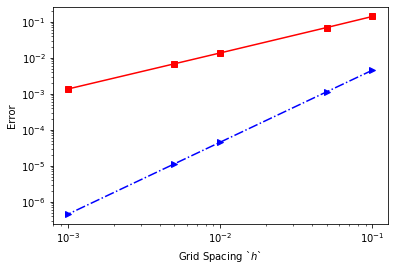

In [4]:
plt.loglog(h,err1,'-sr',h,err2,'-.>b')
plt.xlabel('Grid Spacing `$h$`')
plt.ylabel('Error')

We note that the two plots have different slopes with respect to $h$

If an approximation has an error term $\mathcal{O}(h^{p})$, then

$$\log(\mbox{error})=\log(\mathcal{O}(h^{p}))=\log(Ch^{p})=p\log(Ch)$$

What the slope is from one data point $h$ is not possible, but from two points we extract the $p$ using 

$$p_{k}=\frac{\log(err_{k+1}-err_{k})}{\log(h_{k+1}-h_{k})}$$

Where $err_{k}$ is the error associated with an approximation using a gridspacing $h_{k}$ and $p_{k}$ is the associated approximation to the order of the error using this estimate.


In [5]:

print('The approximate order of the error for FD1 is ',np.log(abs(err1[1:-1]-err1[0:-2]))/np.log(h[0:-2]-h[1:-1]))

print('The approximate order of the error for CD2 is ',np.log(abs(err2[1:-1]-err2[0:-2]))/np.log(h[0:-2]-h[1:-1]))

The approximate order of the error for FD1 is  [0.88081006 0.89843931 0.94114077]
The approximate order of the error for CD2 is  [1.8973614  2.1199687  1.94208367]


This corresponds fairly well with the fact that FD1 is order 1 and that CD2 is order 2.

___

If we wanted to test our methods with respect to another function, say

$$f(x)=x^{2.1}\cos(2\pi x)$$
then we can set that as our function, though remember to update your true solution derivative to 

$$f'(x)=[(2.1)x^{1.1}]\cos(2\pi x)+ x^{2.1}[-2\pi\sin(2\pi x)]$$


In [6]:
def fun1(x):
    y=x**(2.1)*np.cos(2*np.pi*x)
    return y
def dfun1(x):
    y=2.1*x**(1.1)*np.cos(2*np.pi*x)-2*np.pi*x**(2.1)*np.sin(2*np.pi*x)
    return y

h=0.01
x=1.0
df1_approx1=FD1(fun1,x,h)
print('The FD1 approximation is:', df1_approx1)
df1_approx2=CD2(fun1,x,h)
print('The CD2 approximation is:', df1_approx2)
df1_true=dfun1(x)
print('The true value is:', df1_true)

print('Error with FD1', np.abs(df1_approx1-df1_true))
print('Error with CD2', np.abs(df1_approx2-df1_true))

The FD1 approximation is: 1.9100600150300462
The CD2 approximation is: 2.095859972135122
The true value is: 2.1000000000000014
Error with FD1 0.18993998496995523
Error with CD2 0.004140027864879325
